In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/jazmingutierrez/DEC2023 Instacart Basket Analysis'

In [3]:
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_final_clean.pkl'))

Text(0.5, 1.0, 'Loyalty Compared to Spending Habit')

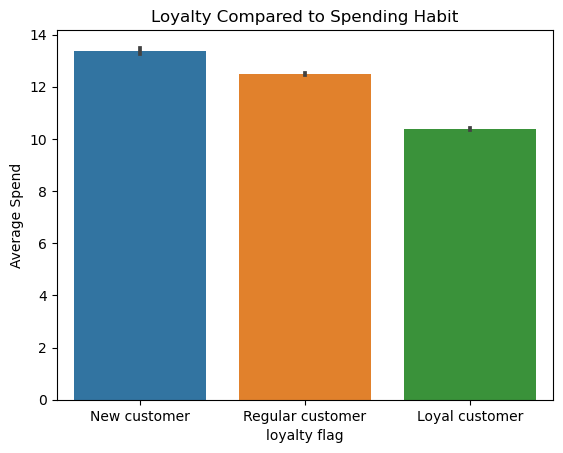

In [77]:
Bar_loyalty_spend=sns.barplot( data= df_all_final, x = 'loyalty_flag', y = 'average_spend')
plt.xlabel('loyalty flag')
plt.ylabel('Average Spend')
plt.title('Loyalty Compared to Spending Habit')

In [78]:
bar_loyalty_spend= plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Loyalty_spend.png'))

<Figure size 640x480 with 0 Axes>

In [6]:
pd.set_option('display.max_columns', None)
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spender,spender_flag,average_spend,Customer_frequency,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,merged,Region,Exclusion flag,Age Group,Income Category,Dependants Category,Customer Family Type,Customer Age Type,Customer Age Typr,department
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity Customer,Young Adult,Lowest Income,Dependants,"Married, Dependants, Lowest Income","Married, Young Adult",nan,beverages
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity Customer,Young Adult,Lowest Income,Dependants,"Married, Dependants, Lowest Income","Married, Young Adult",nan,beverages
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busiest days,Most orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity Customer,Young Adult,Lowest Income,Dependants,"Married, Dependants, Lowest Income","Married, Young Adult",nan,beverages
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busiest days,Average orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity Customer,Young Adult,Lowest Income,Dependants,"Married, Dependants, Lowest Income","Married, Young Adult",nan,beverages
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,Mid-range product,Least busy,Least busiest days,Most orders,10,New customer,14.0,Low_spender,6.367797,20.5,Non_frequent_customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High Activity Customer,Young Adult,Lowest Income,Dependants,"Married, Dependants, Lowest Income","Married, Young Adult",nan,beverages


In [8]:
# Create a crosstab to act as a pivot for analysis

pivot_loyalty_dept = pd.crosstab(df_final['department'], df_final['loyalty_flag'], dropna = False)


# View results of crosstab creation

pivot_loyalty_dept

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38726,28647,77301
babies,167108,46708,196576
bakery,381686,172636,570704
beverages,855024,396658,1320252
breakfast,223866,107357,346872
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1835676,752101,2604051
deli,324046,158335,521453


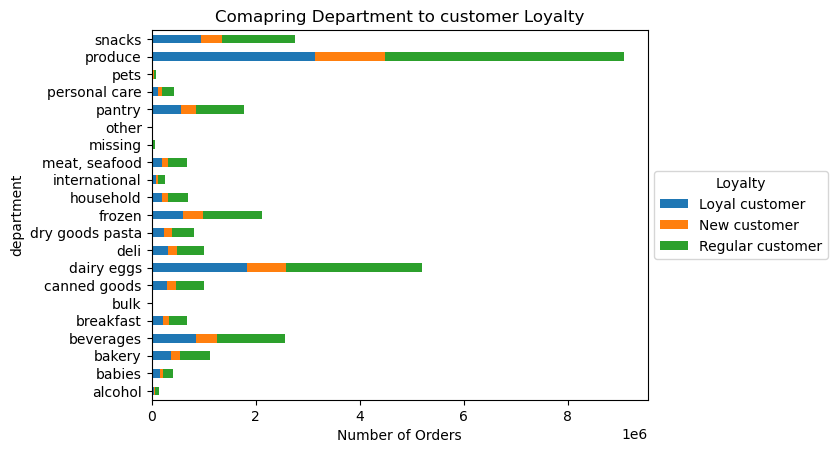

In [9]:
# make bar plot for department_id and loyalty flag
bar_dep_loyalty = pivot_loyalty_dept.plot.barh(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_dep_loyalty.set(xlabel='Number of Orders', ylabel='department', title='Comapring Department to customer Loyalty')
bar_dep_loyalty.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Loyalty')

In [10]:
bar_dep_loyalty= plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dep_loyalty.png'))

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Loyalty')

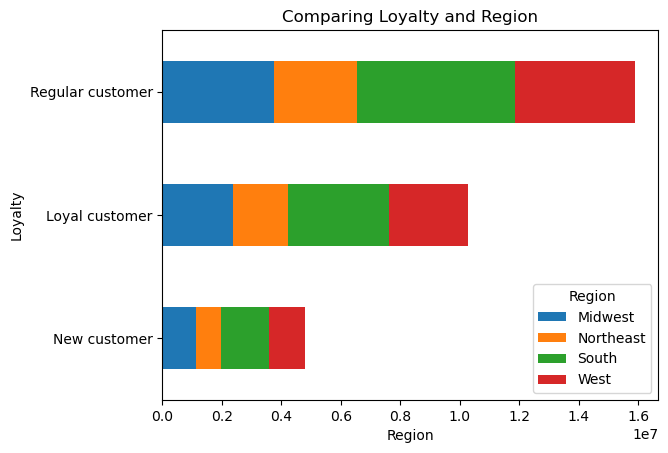

In [12]:
# Group loyaly flag and region

bar_loyalty_region = df_final.groupby(['loyalty_flag', 'Region']).size().unstack()

bar_loyalty_region = bar_loyalty_region.loc[bar_loyalty_region.sum(axis = 1).sort_values(ascending = True).index]

# Create bar plot

bar_loyalty_region = bar_loyalty_region.plot.barh(stacked = True)

# Title and labels

plt.title('Comparing Loyalty and Region')
plt.xlabel('Region')
plt.ylabel('Loyalty')

In [13]:
bar_loyalty_region= plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_region.png'))

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'department')

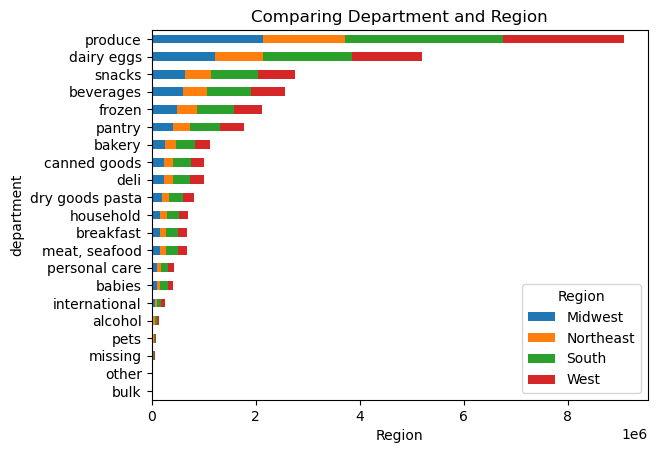

In [14]:
# Group department and region

bar_dep_region = df_final.groupby(['department', 'Region']).size().unstack()

bar_dep_region = bar_dep_region.loc[bar_dep_region.sum(axis = 1).sort_values(ascending = True).index]

# Create bar plot

bar_dep_region = bar_dep_region.plot.barh(stacked = True)

# Title and labels

plt.title('Comparing Department and Region')
plt.xlabel('Region')
plt.ylabel('department')

In [15]:
bar_dep_region= plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dep_region.png'))

<Figure size 640x480 with 0 Axes>

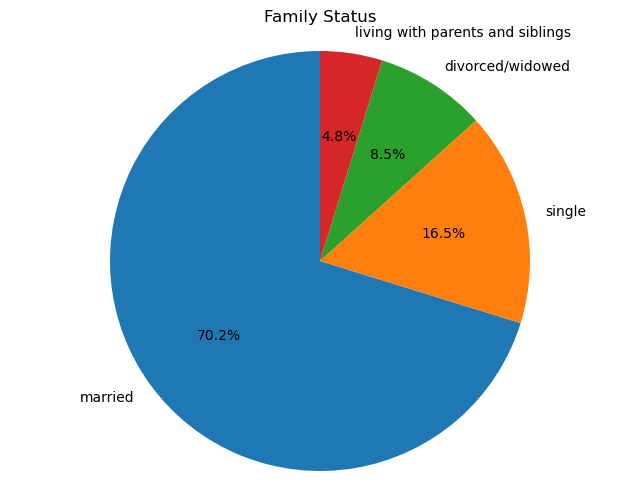

In [17]:
# Calculate value counts
count = df_final['fam_status'].value_counts()

# Plotting the pie chart
pie_fam_status=plt.figure(figsize=(8, 6))
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90)
plt.title('Family Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [18]:
pie_fam_status= plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_fam_status.png'))

<Figure size 640x480 with 0 Axes>

In [21]:
# Create a crosstab to act as a pivot for analysis

pivot_fam_status_age = pd.crosstab(df_final['fam_status'], df_final['Age Group'], dropna = False)


# View results of crosstab creation

pivot_fam_status_age

Age Group,Adult,Elder,Young Adult
fam_status,,,
divorced/widowed,623848,2023913,0
living with parents and siblings,0,0,1482611
married,9055095,6178833,6529093
single,2436325,0,2662946


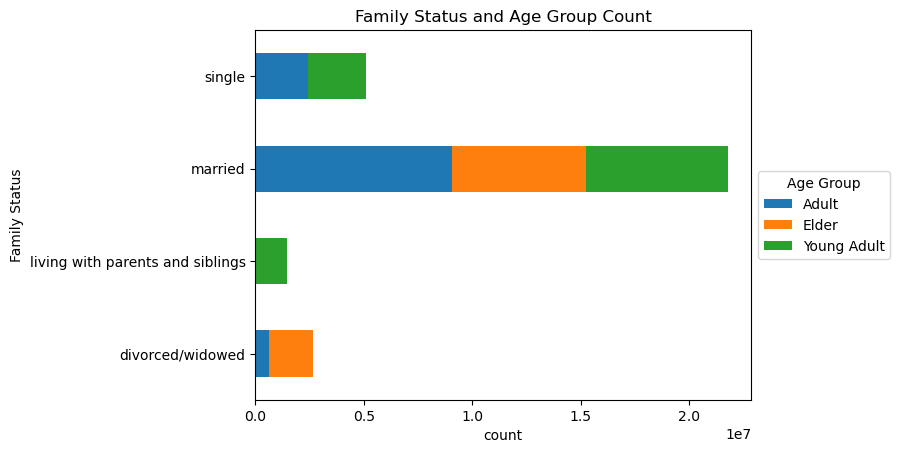

In [22]:
# make bar plot for fam_status and Age Group
bar_fam_status_age = pivot_fam_status_age.plot.barh(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_fam_status_age.set(xlabel='count', ylabel='Family Status', title='Family Status and Age Group Count')
bar_fam_status_age.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Age Group')

In [23]:
bar_fam_status_age= plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_fam_status_age.png'))

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'department')

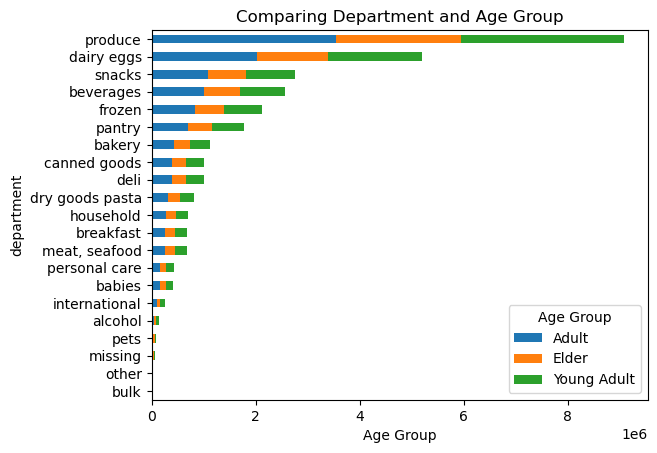

In [35]:
# Group department and Age Group

bar_age_dep = df_final.groupby(['department', 'Age Group']).size().unstack()

bar_age_dep = bar_age_dep.loc[bar_age_dep.sum(axis = 1).sort_values(ascending = True).index]

# Create bar plot

bar_age_dep = bar_age_dep.plot.barh(stacked = True)

# Title and labels

plt.title('Comparing Department and Age Group')
plt.xlabel('Age Group')
plt.ylabel('department')

In [43]:
bar_dep_age= plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dep_age.png'))

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'department')

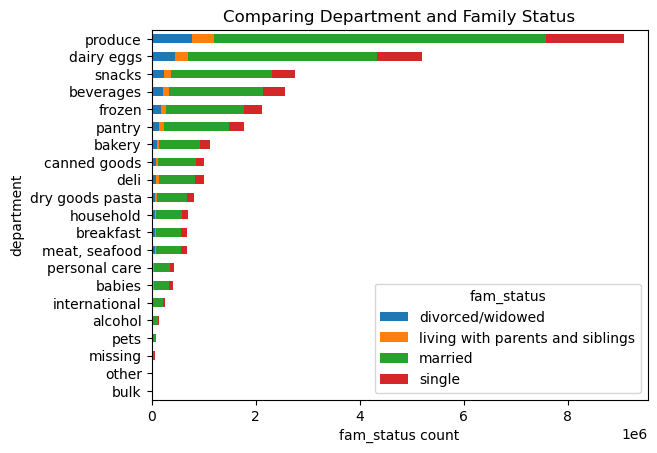

In [37]:
# Group department and Age Group

bar_fam_dep = df_final.groupby(['department', 'fam_status']).size().unstack()

bar_fam_dep = bar_fam_dep.loc[bar_fam_dep.sum(axis = 1).sort_values(ascending = True).index]

# Create bar plot

bar_fam_dep = bar_fam_dep.plot.barh(stacked = True)

# Title and labels

plt.title('Comparing Department and Family Status')
plt.xlabel('fam_status count')
plt.ylabel('department')

In [38]:
# Create a crosstab to act as a pivot for analysis

pivot_cust_fam_price = pd.crosstab(df_final['Customer Family Type'], df_final['price_range_loc'], dropna = False)


# View results of crosstab creation

pivot_cust_fam_price

price_range_loc,High-range product,Low-range product,Mid-range product
Customer Family Type,,,
"Married, Dependants, High Income",84283,1719950,3980008
"Married, Dependants, Low Income",70822,1518418,3532473
"Married, Dependants, Lowest Income",46823,1860570,3243986
"Married, Dependants, Middle Income",79576,1694898,3931214
"Single, High Income",13105,277243,643252
"Single, Low Income",21056,464014,1073091
"Single, Lowest Income",15514,554029,1030872
"Single, Middle Income",13646,297585,695864
nan,53132,1288193,2789047


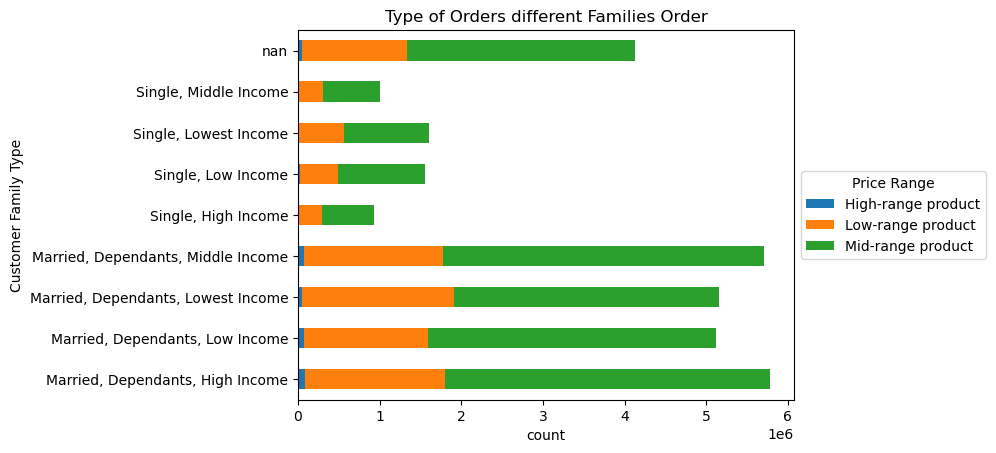

In [40]:
# make bar plot for Family Customer Type and Price range product
bar_cus_fam_price = pivot_cust_fam_price.plot.barh(stacked=True)

# Add labels and a title and put titled legend next to chart

bar_cus_fam_price.set(xlabel='count', ylabel='Customer Family Type', title='Type of Orders different Families Order')
bar_cus_fam_price.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Price Range')

In [42]:
bar_cus_fam_price= plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_cus_fam_price.png'))

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'department')

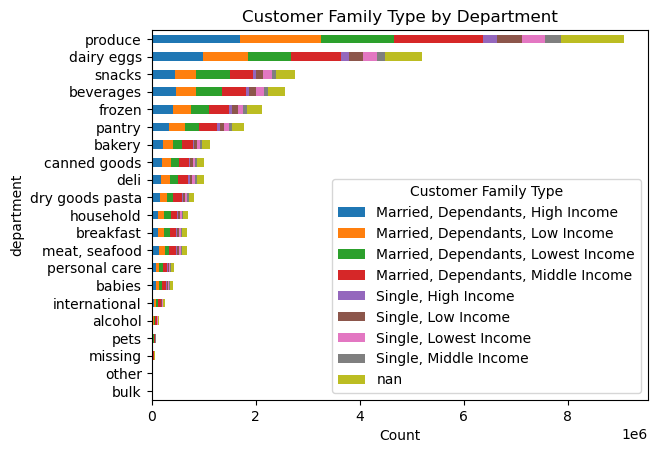

In [48]:
# Group department and Customer Family Type

bar_dep_cus = df_final.groupby(['department', 'Customer Family Type']).size().unstack()

bar_dep_cus = bar_dep_cus.loc[bar_dep_cus.sum(axis = 1).sort_values(ascending = True).index]

# Create bar plot

bar_dep_cus = bar_dep_cus.plot.barh(stacked = True)

# Title and labels

plt.title('Customer Family Type by Department')
plt.xlabel('Count')
plt.ylabel('department')

In [50]:
bar_dep_cus= plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dep_cus.png'))

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Frequency of Days Since Prior Order')

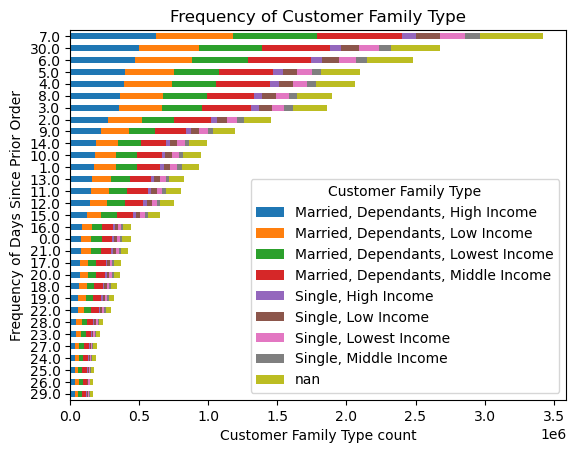

In [65]:
# Group department and Age Group

bar_cus_freq = df_final.groupby(['days_since_prior_order', 'Customer Family Type']).size().unstack()

bar_cus_freq = bar_cus_freq.loc[bar_cus_freq.sum(axis = 1).sort_values(ascending = True).index]

# Create bar plot

bar_cus_freq = bar_cus_freq.plot.barh(stacked = True)

# Title and labels

plt.title('Frequency of Customer Family Type')
plt.xlabel('Customer Family Type count')
plt.ylabel('Frequency of Days Since Prior Order')

In [66]:
bar_cus_freq= plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_cus_freq.png'))

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Time Customers Spend')

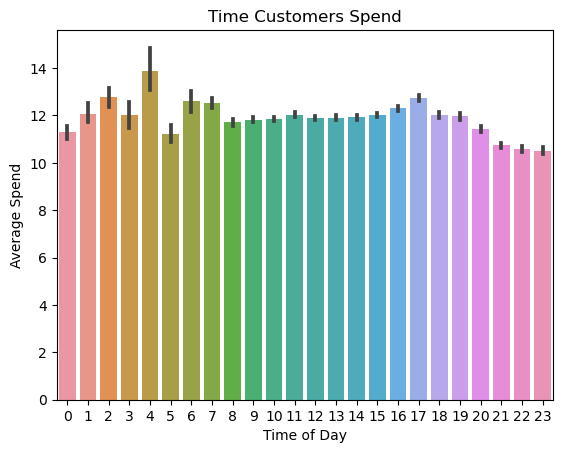

In [6]:
# Create the bar plot
Bar_time_spend = sns.barplot(data=df_final, x='time_of_day', y='average_spend')
plt.xlabel('Time of Day')
plt.ylabel('Average Spend')
plt.title('Time Customers Spend')

In [7]:
bar_time_spend= plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_time_spend.png'))

<Figure size 640x480 with 0 Axes>